# 因子测试与分析

 1. **优先级排序标准**  
   - **ICIR > 逻辑独立性 > 稳定性**  
     - 先筛选IR绝对值>0.3的因子（pb、MA20_deviation、Momentum20_z）。  
     - 再剔除高相关性因子（如RSI14 vs MA20_deviation）。  
     - 最后保留逻辑互补的辅助因子（ATR_ratio、log_total_mv）。  


**1. 保留的核心因子及原因**
| **因子**          | **类型**       | **保留原因**                                                                 | **潜在风险**                     |
|-------------------|---------------|-----------------------------------------------------------------------------|---------------------------------|
| **pb**            | 价值因子       | - IR最高（-0.478），负向预测能力稳定<br>- 逻辑清晰（高市净率股票长期弱势）       | 需结合其他因子避免单一价值暴露       |
| **MA20_deviation** | 反转因子       | - 最强反转效应（IC=-0.074）<br>- 与pb相关性低（0.182），分散风险               | 高波动性（IC标准差0.218）需动态调整权重 |
| **ATR_ratio**     | 波动率因子     | - 唯一中期正相关因子（5日IC=0.117）<br>- 提供波动维度，与其他因子逻辑互补       | IC方向稳定性较差（IC>0比例36.8%）    |
| **log_total_mv**  | 规模因子       | - 中长期负相关性稳定（10日IC=-0.08）<br>- 捕捉市值溢价效应                     | 极高波动性（IC标准差0.266）需严格降权 |

---

 **2. 剔除的因子及原因**
| **因子**          | **类型**       | **剔除原因**                                                                 | **替代方案**                     |
|-------------------|---------------|-----------------------------------------------------------------------------|---------------------------------|
| **EP**            | 价值因子       | - IR接近0（+0.032），无实际预测能力<br>- IC>0比例53.8%，方向完全随机           | 改用pb   |
| **RSI14**         | 反转因子       | - 与MA20_deviation高度相关（0.819）<br>- IR（-0.336）略低于MA20_deviation      | 保留MA20_deviation作为代表         |
| **Momentum20_z**  | 动量/反转因子  | - 与MA20_deviation逻辑重叠（均为反转）<br>- IR（-0.346）相近但稳定性更差        |-     |
| **log_circ_mv**   | 规模因子       | - 与log_total_mv高度相关（0.930）<br>- IR（-0.153）显著低于log_total_mv        | 保留log_total_mv作为代表           |
| **sqrt_turnover** | 流动性因子    | - IR过低（-0.300）<br>- IC方向不稳定（IC>0比例30.2%）                          | 需引入更稳定的流动性指标（如Amihud比率）|

---




In [11]:
import pandas as pd
file_path = '../data/factors.csv'
df = pd.read_csv(file_path)
df = df.dropna()

## 1.相关性分析

### 1.1因子与收益率相关性

C:\Users\nitee\AppData\Local\Temp\ipykernel_71676\3193921859.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().round(3)


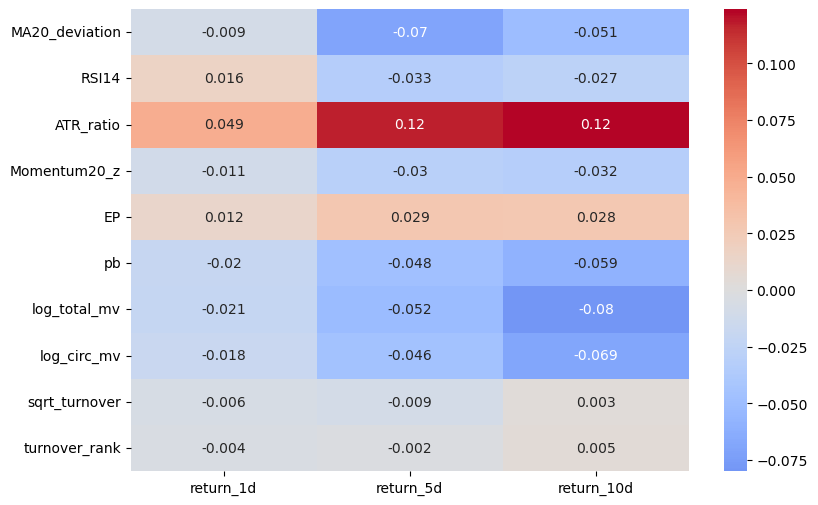

In [12]:
# 计算完整相关系数矩阵（保留3位小数）
corr_matrix = df.corr().round(3)

# 重点关注收益率相关列
return_cols = ['return_1d', 'return_5d', 'return_10d']
all_factors = ['MA20_deviation', 'RSI14', 'ATR_ratio', 'Momentum20_z', 
              'EP', 'pb', 'log_total_mv', 'log_circ_mv', 'sqrt_turnover', 'turnover_rank']

# 提取收益率相关相关系数
return_correlations = corr_matrix.loc[all_factors, return_cols]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))
sns.heatmap(return_correlations, annot=True, cmap='coolwarm', center=0)
plt.show()

In [13]:
return_correlations

,return_1d,return_5d,return_10d
MA20_deviation,-0.009,-0.070,-0.051
RSI14,0.016,-0.033,-0.027
ATR_ratio,0.049,0.117,0.124
Momentum20_z,-0.011,-0.030,-0.032
EP,0.012,0.029,0.028
pb,-0.020,-0.048,-0.059
log_total_mv,-0.021,-0.052,-0.080
log_circ_mv,-0.018,-0.046,-0.069
sqrt_turnover,-0.006,-0.009,0.003
turnover_rank,-0.004,-0.002,0.005


### 1.2因子间相关性

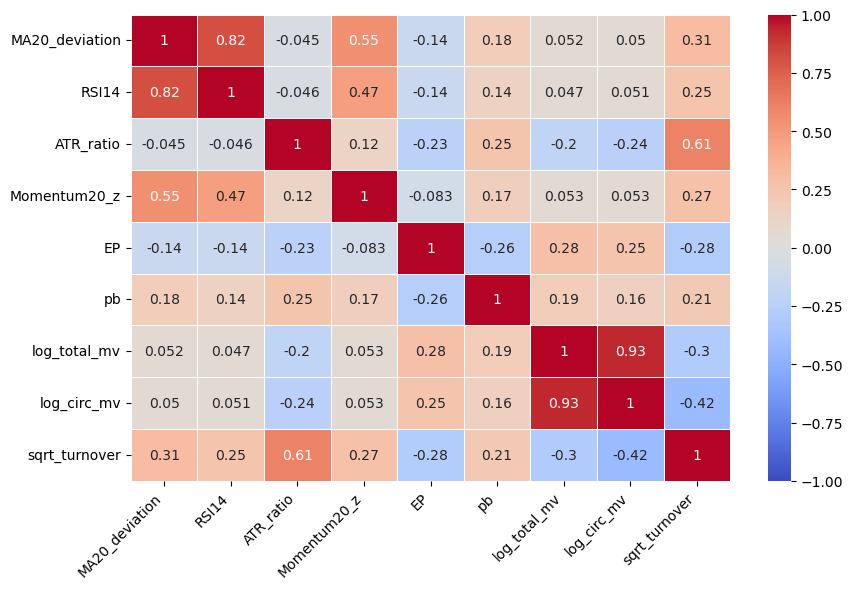

In [33]:
factor_columns = ['MA20_deviation', 'RSI14', 'ATR_ratio', 'Momentum20_z', 
                 'EP', 'pb', 'log_total_mv', 'log_circ_mv', 'sqrt_turnover']

correlation_matrix1 = df[factor_columns].corr().round(3)
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix1, 
            annot=True, 
            cmap='coolwarm',
            center=0,
            vmin=-1, 
            vmax=1,
            linewidths=0.5,
            annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
correlation_matrix1

,MA20_deviation,RSI14,ATR_ratio,Momentum20_z,EP,pb,log_total_mv,log_circ_mv,sqrt_turnover
MA20_deviation,1.000,0.819,-0.045,0.547,-0.139,0.182,0.052,0.050,0.310
RSI14,0.819,1.000,-0.046,0.473,-0.139,0.145,0.047,0.051,0.251
ATR_ratio,-0.045,-0.046,1.000,0.120,-0.228,0.249,-0.196,-0.239,0.609
Momentum20_z,0.547,0.473,0.120,1.000,-0.083,0.165,0.053,0.053,0.269
EP,-0.139,-0.139,-0.228,-0.083,1.000,-0.260,0.276,0.251,-0.277
pb,0.182,0.145,0.249,0.165,-0.260,1.000,0.186,0.159,0.213
log_total_mv,0.052,0.047,-0.196,0.053,0.276,0.186,1.000,0.930,-0.296
log_circ_mv,0.050,0.051,-0.239,0.053,0.251,0.159,0.930,1.000,-0.423
sqrt_turnover,0.310,0.251,0.609,0.269,-0.277,0.213,-0.296,-0.423,1.000


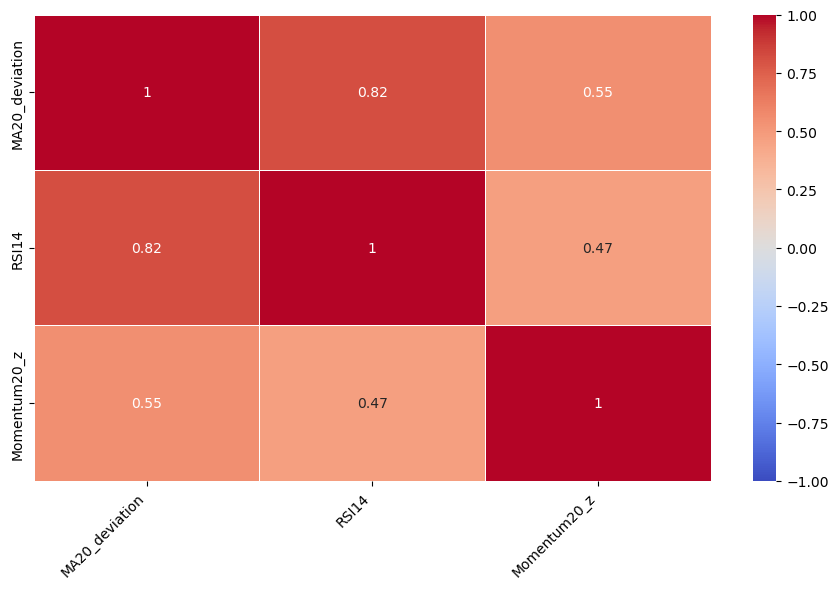

In [15]:
import matplotlib.pyplot as plt
# 选择所有需要分析的因子列
factor_columns = ['MA20_deviation', 'RSI14', 'Momentum20_z', 
                  ]

correlation_matrix = df[factor_columns].corr().round(3)
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm',
            center=0,
            vmin=-1, 
            vmax=1,
            linewidths=0.5,
            annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 2.ICIR指标分析

各指标的经济含义和判断标准：

| 指标 | 理想值 | 可接受范围 | 经济含义 |
|------|--------|------------|----------|
| IC均值 | 绝对值>0.05 | 绝对值>0.03 | 因子预测能力强度 |
| IC标准差 | 越小越好 | <0.2 | 因子稳定性 |
| IR | 绝对值>0.5 | 绝对值>0.3 | 风险调整后预测能力 |
| IC>0比例 | >70%或<30% | >60%或<40% | 因子方向稳定性 |

In [17]:
df=df.dropna(axis=0)

In [21]:
import pandas as pd
import numpy as np
import scipy.stats as st

# 计算Rank IC（Spearman相关系数）
def calculate_ic(factor_series, return_series):
    # 处理缺失值
    valid_mask = ~(factor_series.isna() | return_series.isna())
    factor_series = factor_series[valid_mask]
    return_series = return_series[valid_mask]
    return st.spearmanr(factor_series, return_series)[0]

# 计算多期IC和IR
ic_results = {}
factors = ['MA20_deviation', 'RSI14', 'ATR_ratio', 'Momentum20_z', 
           'EP', 'pb', 'log_total_mv', 'log_circ_mv', 'sqrt_turnover']
for factor in factors:
    ics = []  # 初始化ics列表
    for date in df['trade_date'].unique():
        date_df = df[df['trade_date'] == date]
        ic = calculate_ic(date_df[factor], date_df['return_5d'])  # 使用5天收益率
        ics.append(ic)
    
    ic_series = pd.Series(ics)
    ic_mean = ic_series.mean()
    ic_std = ic_series.std()
    ir = ic_mean / ic_std if ic_std != 0 else 0
    
    ic_results[factor] = {
        'IC均值': ic_mean,
        'IC标准差': ic_std,
        'IR': ir,
        'IC>0比例': (ic_series > 0).mean()
    }

ic_df = pd.DataFrame(ic_results).T

### 因子表现排名（基于IR绝对值）


In [26]:
ic_df.sort_values(by='IR', key=abs,ascending=False, inplace=True)
ic_df

,IC均值,IC标准差,IR,IC>0比例
pb,-0.053131,0.111067,-0.478374,0.316038
Momentum20_z,-0.071846,0.207747,-0.345833,0.372642
MA20_deviation,-0.073701,0.218223,-0.337735,0.386792
RSI14,-0.067166,0.200007,-0.335818,0.386792
sqrt_turnover,-0.056701,0.188915,-0.300143,0.301887
log_total_mv,-0.062084,0.265653,-0.233703,0.349057
log_circ_mv,-0.037505,0.244810,-0.153200,0.400943
ATR_ratio,-0.030647,0.216246,-0.141721,0.367925
EP,0.005348,0.165153,0.032383,0.537736


## 3.alphalens分析
**以sqrt_turnover因子为例**
`['sqrt_turnover']*-1`因子
 - **单调性**：同分位数在各持有期的平均收益率及分布情况
 - **对称性**：“Factor Weighted Long/Short Portfolio Cumulative Return (1D Period)”基于因子加权的多空投资组合累计收益变化。
 - **有效性**：观察到高分位数组合是否常跑赢低分位数组合，可以说明因子与股票未来收益正相关性，有无预测股票收益能力 。
 - **持续性**：不同持有期累计收益图呈现各分位数组合收益随时间变化，若收益趋势能持续，说明该因子效果在不同时段延续性较好 。 
 - **多空收益差异**：“Top Minus Bottom Quantile Mean Return”系列图表呈现最高和最低分位数平均收益差值，若差值稳定且大，表明因子在多空交易中区分度高、表现佳 。 

Dropped 5.8% entries from factor data: 5.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-4.928712,-1.606655,-3.047954,0.834694,14542,20.115364
2,-3.207872,-1.174853,-1.892552,0.374937,14423,19.950756
3,-2.521888,-0.937881,-1.491777,0.300310,14379,19.889893
4,-2.112667,-0.797208,-1.219875,0.245442,14424,19.952139
5,-1.772304,-0.557227,-0.904491,0.226205,14525,20.091848


Returns Analysis


,1D,5D,10D
Ann. alpha,0.229,0.151,0.126
beta,-0.154,-0.113,-0.129
Mean Period Wise Return Top Quantile (bps),-0.095,-0.306,-0.670
Mean Period Wise Return Bottom Quantile (bps),-7.930,-4.544,-3.622
Mean Period Wise Spread (bps),7.835,4.233,2.878


C:\Users\nitee\AppData\Roaming\Python\Python310\site-packages\alphalens\plotting.py:867: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(1.0, linestyle="-", color="black", lw=1)


<Figure size 640x480 with 0 Axes>

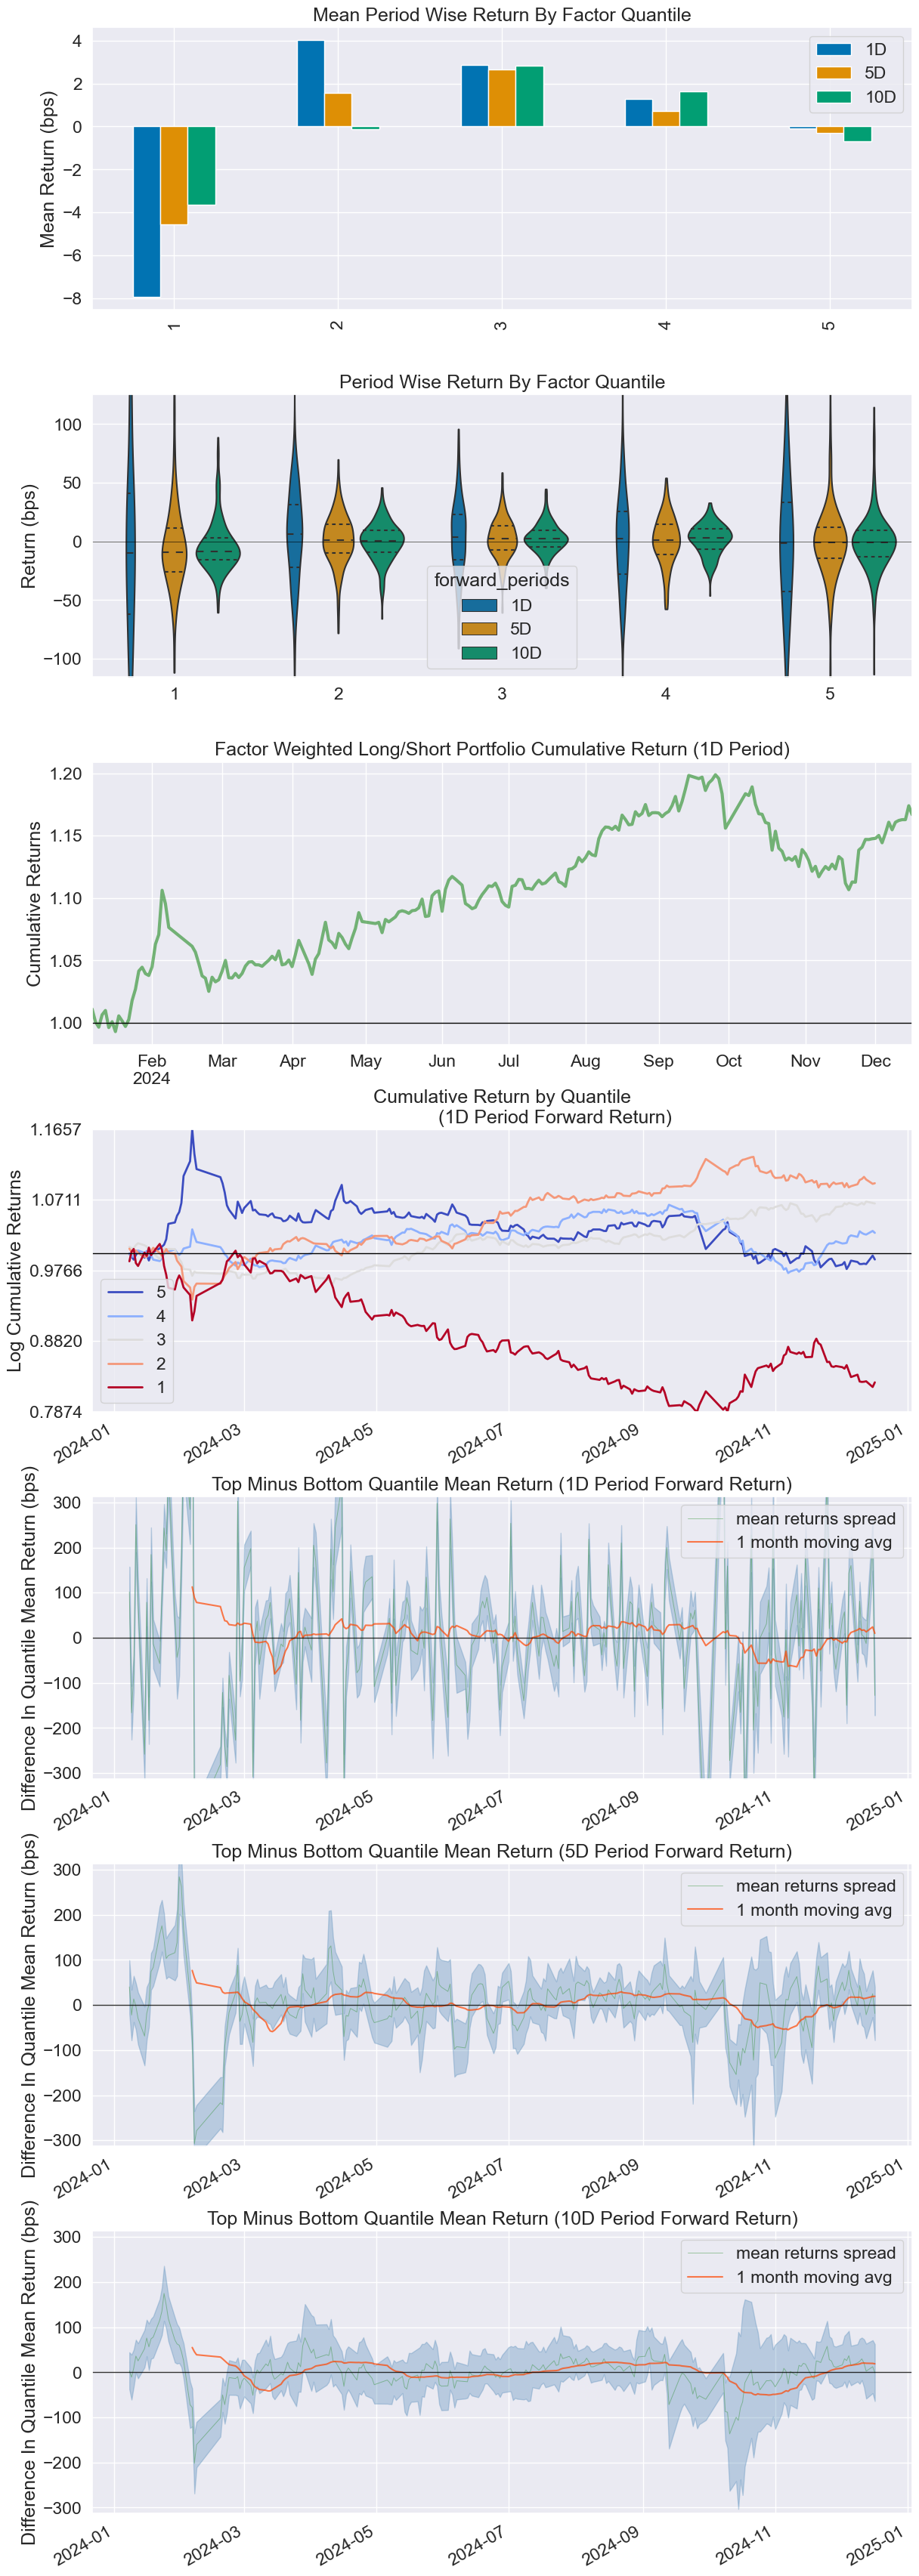

Information Analysis


,1D,5D,10D
IC Mean,0.055,0.069,0.075
IC Std.,0.192,0.182,0.175
Risk-Adjusted IC,0.286,0.379,0.431
t-stat(IC),4.324,5.718,6.501
p-value(IC),0.000,0.000,0.000
IC Skew,-0.199,-0.738,-0.541
IC Kurtosis,0.201,1.282,0.904


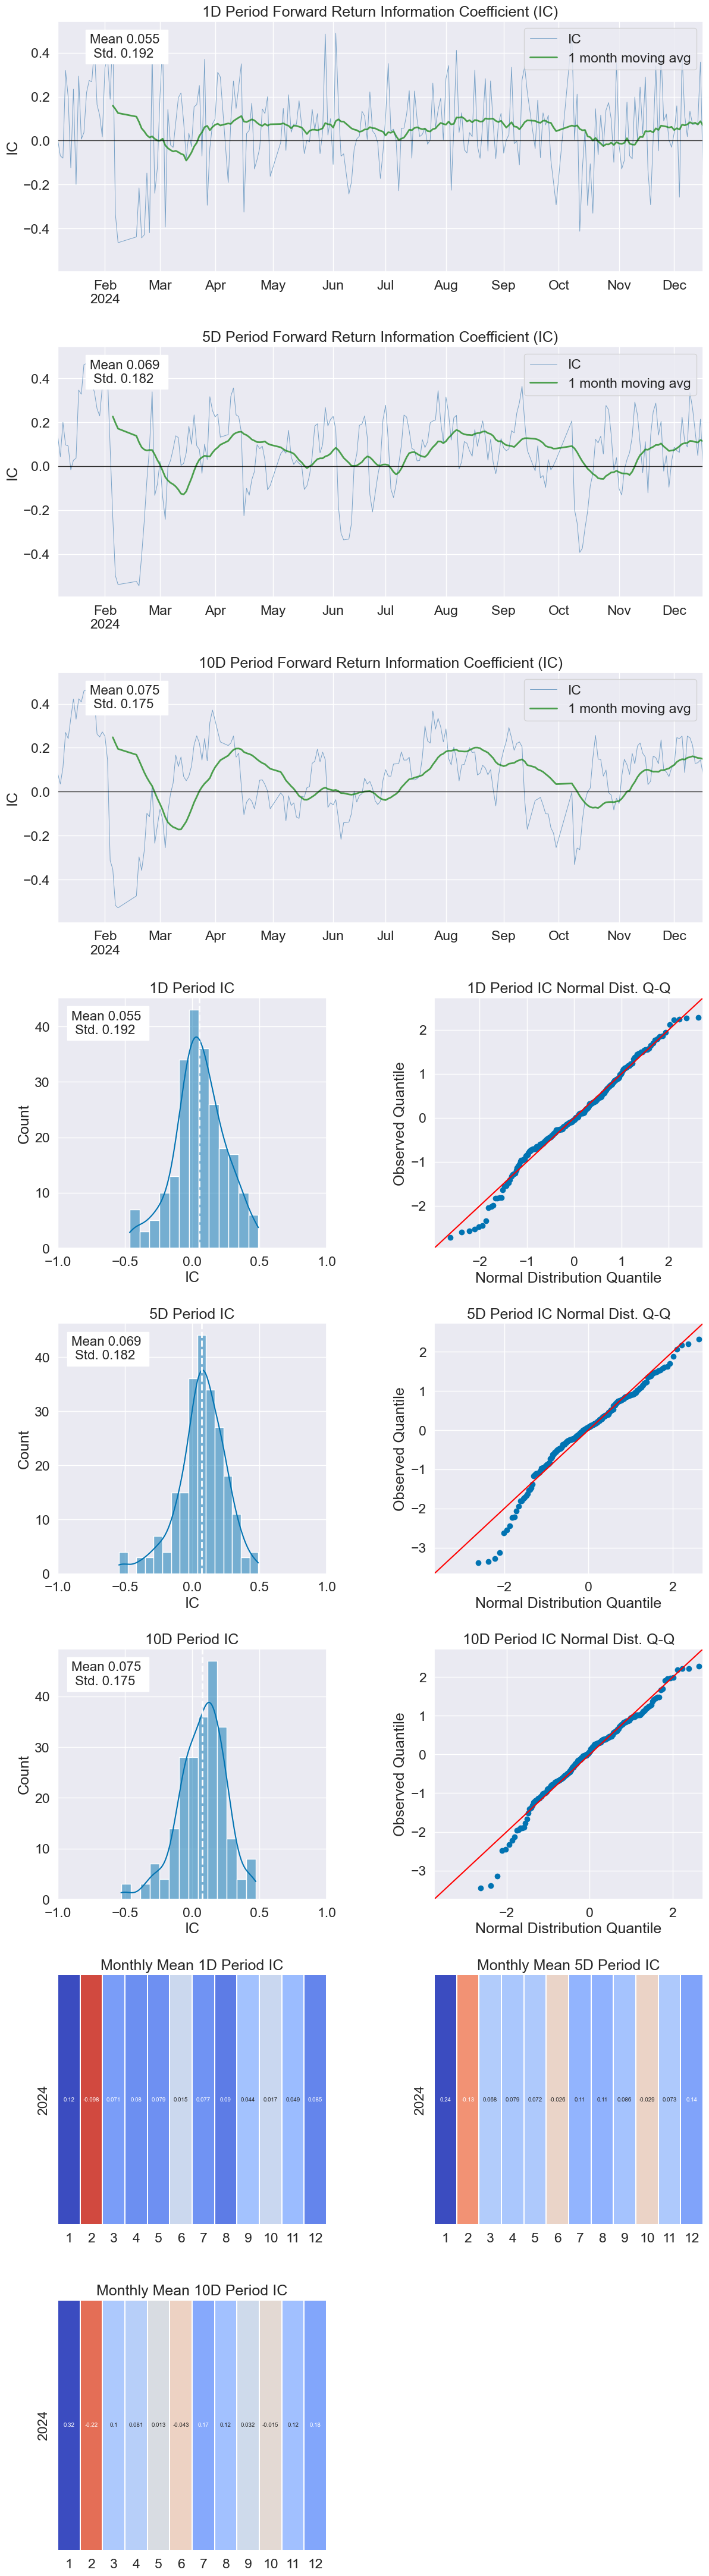

C:\Users\nitee\AppData\Roaming\Python\Python310\site-packages\alphalens\utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.064,0.240,0.325
Quantile 2 Mean Turnover,0.158,0.491,0.591
Quantile 3 Mean Turnover,0.192,0.531,0.612
Quantile 4 Mean Turnover,0.166,0.474,0.552
Quantile 5 Mean Turnover,0.068,0.218,0.273


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.988,0.888,0.822


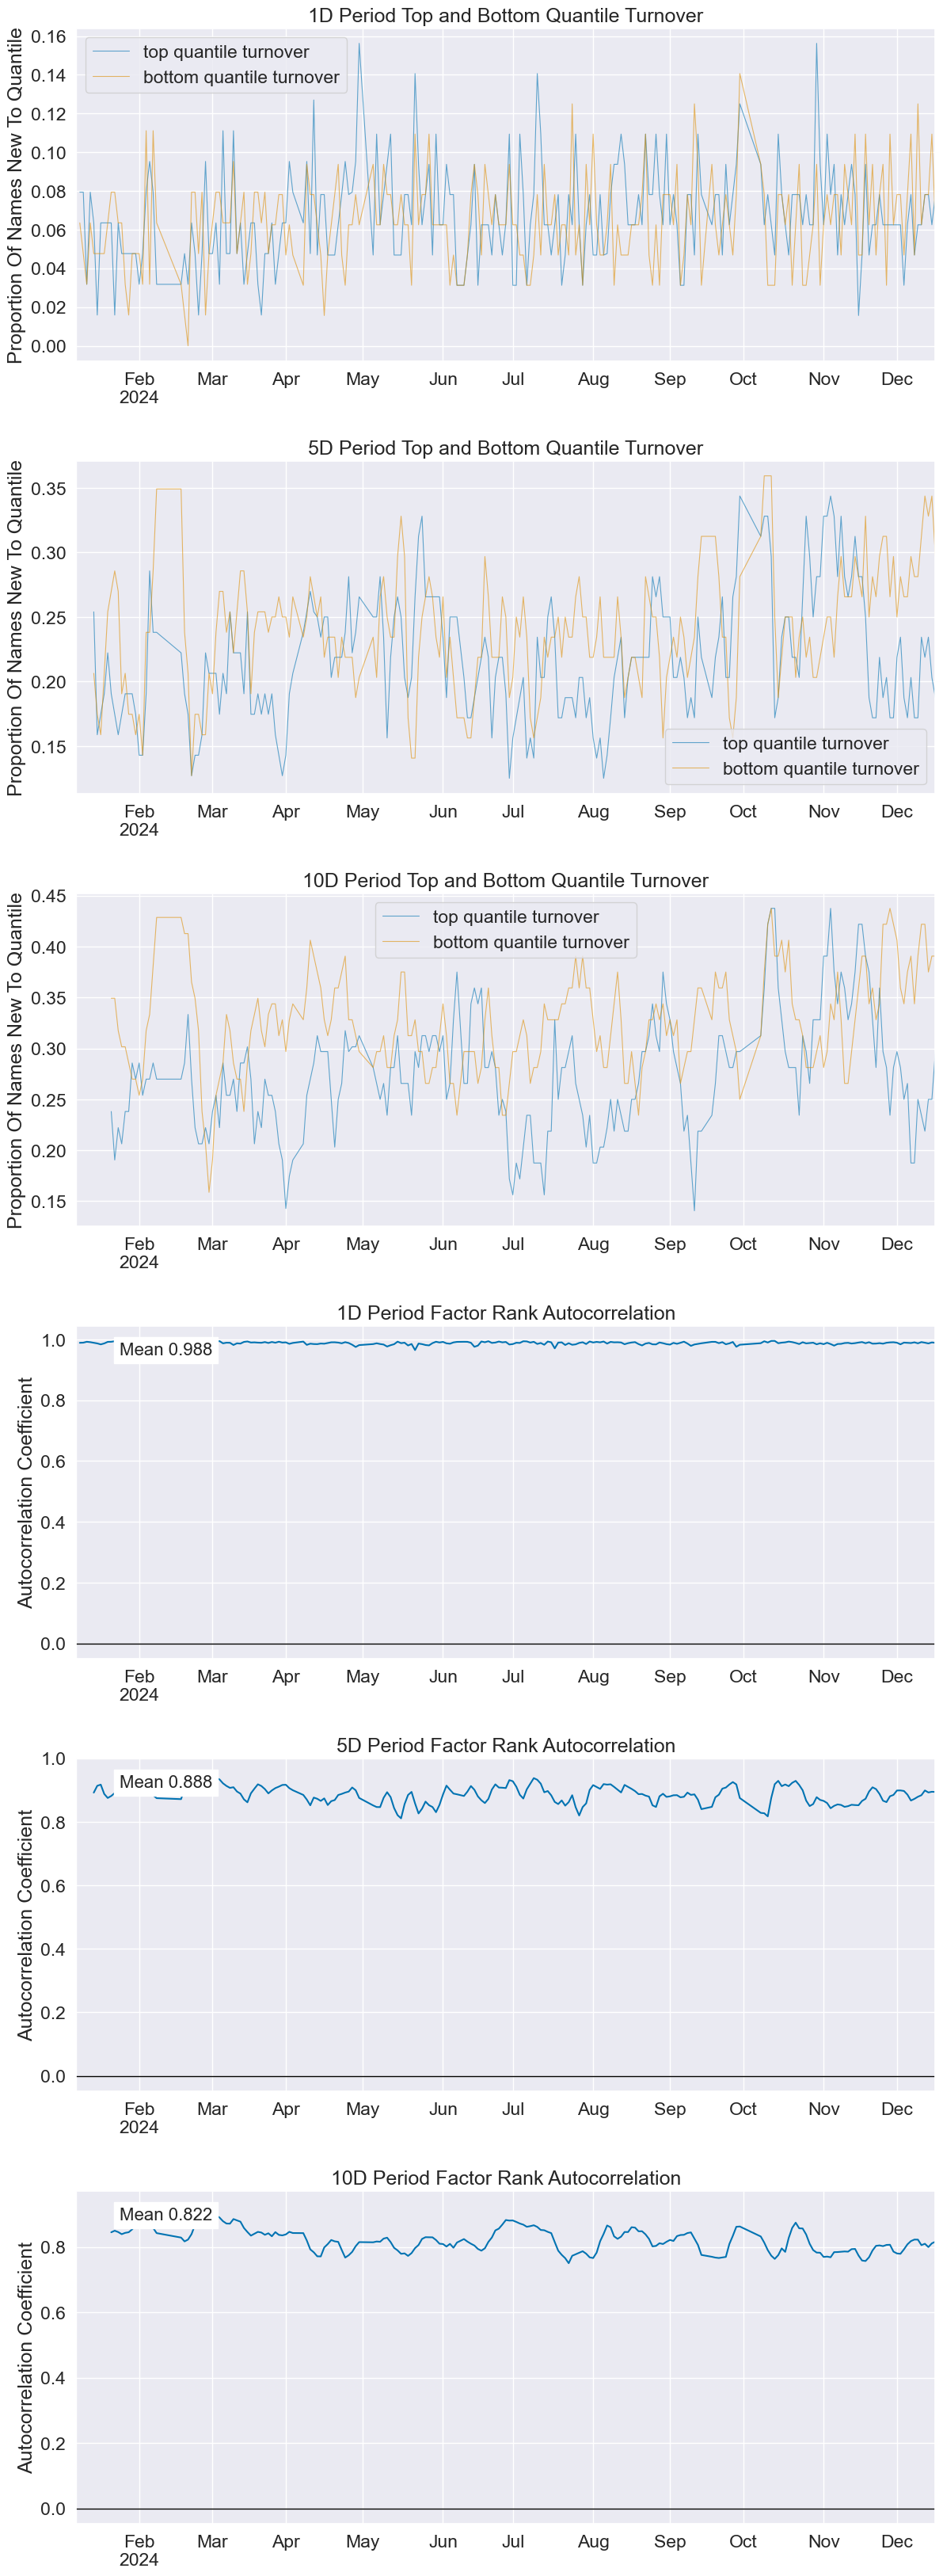

In [ ]:
import alphalens
import pandas as pd

# 确保日期是datetime格式（关键步骤！）
df['trade_date'] = pd.to_datetime(df['trade_date'])

# 1. 准备因子数据（MultiIndex: [日期, 资产]）
factor = df.set_index(['trade_date', 'ts_code'])['sqrt_turnover']*-1

# 2. 准备价格数据（使用收盘价）
prices = df.pivot(index='trade_date', columns='ts_code', values='close')

# 3. 检查价格数据是否单调递增（Alphalens的硬性要求）
prices = prices.sort_index(ascending=True)  # 按日期升序排列

# 4. 计算未来收益率（自动处理收益率计算）
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor=factor,
    prices=prices,
    quantiles=5,          # 分为5组
    periods=(1, 5, 10),   # 分析1/5/10天后的收益
    filter_zscore=20      # 过滤极端值（可选）
)

# 5. 生成完整分析报告
alphalens.tears.create_full_tear_sheet(
    factor_data,
    long_short=True,      # 显示多空组合表现
    group_neutral=False,  # 是否做行业中性处理
    by_group=False        # 是否显示分组分析
)

## 4.互信息

In [27]:
factor_columns = ['MA20_deviation', 'RSI14', 'ATR_ratio', 'Momentum20_z', 
                 'EP', 'pb', 'log_total_mv', 'log_circ_mv', 'sqrt_turnover']
all_y = ['return_1d', 'return_5d', 'return_10d']
X = df[factor_columns]
y = df[['return_1d', 'return_5d', 'return_10d']]

In [28]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features=False, random_state=None):
    results_df = pd.DataFrame(index=X.columns)
    for col in y.columns:
        mi_scores = mutual_info_regression(X, y[col], 
                                         discrete_features=discrete_features,
                                         random_state=random_state)
        results_df[col] = mi_scores
    return results_df

In [29]:
mi_scores = make_mi_scores(X, y, discrete_features=False, random_state=42)
mi_scores

,return_1d,return_5d,return_10d
MA20_deviation,0.061342,0.053671,0.038181
RSI14,0.026585,0.020274,0.015983
ATR_ratio,0.045361,0.044447,0.039383
Momentum20_z,0.012452,0.012961,0.016919
EP,0.012199,0.012258,0.028861
pb,0.017979,0.009205,0.021921
log_total_mv,0.038742,0.022769,0.042995
log_circ_mv,0.036378,0.022973,0.040712
sqrt_turnover,0.037983,0.031559,0.025798


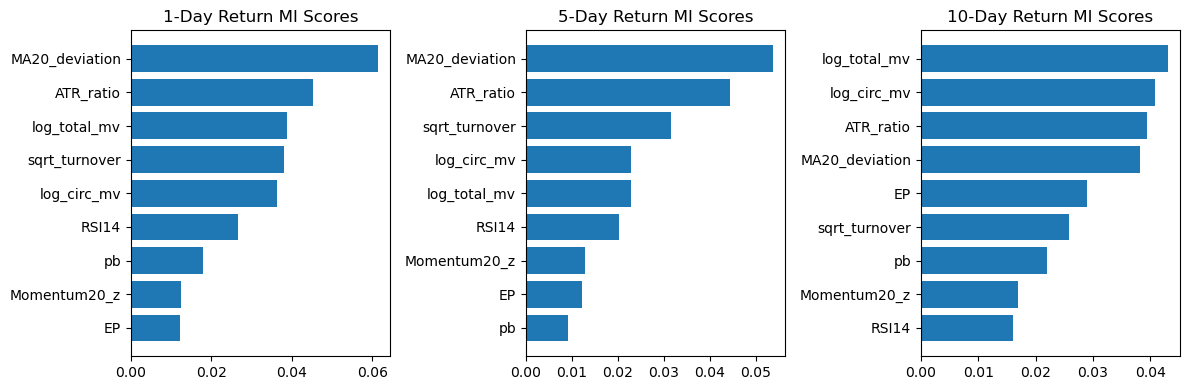

In [30]:
import matplotlib.pyplot as plt
import numpy as np
def plot_mi_scores(scores,title="Mutual Information Scores"):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title(title)

plt.figure(dpi=100, figsize=(12, 4))

# 绘制return_1d的得分
plt.subplot(1, 3, 1)
plot_mi_scores(mi_scores['return_1d'], "1-Day Return MI Scores")

# 绘制return_5d的得分
plt.subplot(1, 3, 2)
plot_mi_scores(mi_scores['return_5d'], "5-Day Return MI Scores")

# 绘制return_10d的得分
plt.subplot(1, 3, 3)
plot_mi_scores(mi_scores['return_10d'], "10-Day Return MI Scores")

# 调整子图间距
plt.tight_layout()
plt.show()